In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import torch
from torch import nn
import sklearn

In [2]:
from sklearn.model_selection import train_test_split

weights, bias = 0.7, 0.3

 # convert [50] to [50, 1]
x = torch.arange(0, 1, 0.02).unsqueeze(dim=1)
y = (weights * x) + bias

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=False)

In [3]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
         
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return (self.weights * x) + self.bias

In [4]:
torch.manual_seed(20)
model = LinearRegressionModel()
list(model.parameters()), model.state_dict()

([Parameter containing:
  tensor([-1.2061], requires_grad=True),
  Parameter containing:
  tensor([0.0617], requires_grad=True)],
 OrderedDict([('weights', tensor([-1.2061])), ('bias', tensor([0.0617]))]))

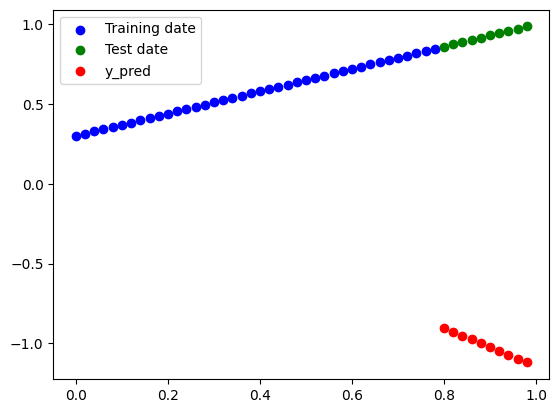

In [5]:
with torch.inference_mode(): 
    y_pred = model(x_test)

plt.scatter(x_train, y_train, c='b', label='Training date')
plt.scatter(x_test, y_test, c='g', label='Test date')
plt.scatter(x_test, y_pred, c='r', label='y_pred')
plt.legend()
plt.show()

In [6]:
# Set a manual seed for reproducibility
# This ensures that random values (like model weight initialization) are the same every time
torch.manual_seed(36)

# Instantiate the model: Create an instance of your custom LinearRegressionModel
# This model will learn the relationship y ≈ weight * x + bias
model_01 = LinearRegressionModel()

# Define the loss function: L1Loss computes the Mean Absolute Error (MAE)
# It measures the average absolute difference between predictions and true values
loss_fn = nn.L1Loss()

# Define the optimizer: Stochastic Gradient Descent (SGD)
# It will update the model's parameters (weights and bias) to minimize the loss
# lr (learning rate) controls the step size during updates — 0.001 is small for stable learning
optimizer = torch.optim.SGD(params=model_01.parameters(), lr=0.001)

# One epoch = one full pass through the entire training dataset
epochs = 501

# Training loop: Iterate over each epoch
for epoch in range(epochs):
    # Set the model to training mode
    # This is important if your model has layers like Dropout or BatchNorm (not in this case)
    model_01.train()

    # Forward pass: Compute model predictions on the training data
    y_pred = model_01(x_train)

    # Compute the loss: Compare predictions (y_pred) with true labels (y_train)
    loss = loss_fn(y_pred, y_train)

    # Print training progress every 50 epochs for clarity (avoid flooding the console)
    if epoch % 50 == 0:
        print(f'Epoch {epoch}: Loss = {loss:.4f} -> {model_01.state_dict()}')

    # Zero the gradients before backpropagation
    # Gradients are accumulated by default, so we need to clear them to avoid interference
    optimizer.zero_grad()

    # Backward pass: Compute gradients of the loss with respect to each parameter
    # This step uses automatic differentiation (autograd) to calculate how to adjust weights
    loss.backward()

    # Optimization step: Update model parameters (weights and bias) using SGD
    # The optimizer adjusts parameters in the direction that reduces the loss
    optimizer.step()

# At the end of training, the model should have learned weights and bias close to the true values

model_01.eval()

with torch.inference_mode():
    test_pred = model_01(x_test)
    test_loss = loss_fn(test_pred, y_test)

print(f"\n Final Test Loss: {test_loss:.4f}")
print(f" Learned Parameters: {model_01.state_dict()}")

Epoch 0: Loss = 0.4408 -> OrderedDict({'weights': tensor([0.4704]), 'bias': tensor([-0.0512])})
Epoch 50: Loss = 0.3832 -> OrderedDict({'weights': tensor([0.4899]), 'bias': tensor([-0.0012])})
Epoch 100: Loss = 0.3256 -> OrderedDict({'weights': tensor([0.5094]), 'bias': tensor([0.0488])})
Epoch 150: Loss = 0.2680 -> OrderedDict({'weights': tensor([0.5289]), 'bias': tensor([0.0988])})
Epoch 200: Loss = 0.2104 -> OrderedDict({'weights': tensor([0.5484]), 'bias': tensor([0.1488])})
Epoch 250: Loss = 0.1528 -> OrderedDict({'weights': tensor([0.5679]), 'bias': tensor([0.1988])})
Epoch 300: Loss = 0.0952 -> OrderedDict({'weights': tensor([0.5874]), 'bias': tensor([0.2488])})
Epoch 350: Loss = 0.0376 -> OrderedDict({'weights': tensor([0.6069]), 'bias': tensor([0.2988])})
Epoch 400: Loss = 0.0157 -> OrderedDict({'weights': tensor([0.6237]), 'bias': tensor([0.3247])})
Epoch 450: Loss = 0.0131 -> OrderedDict({'weights': tensor([0.6344]), 'bias': tensor([0.3265])})
Epoch 500: Loss = 0.0114 -> Ord

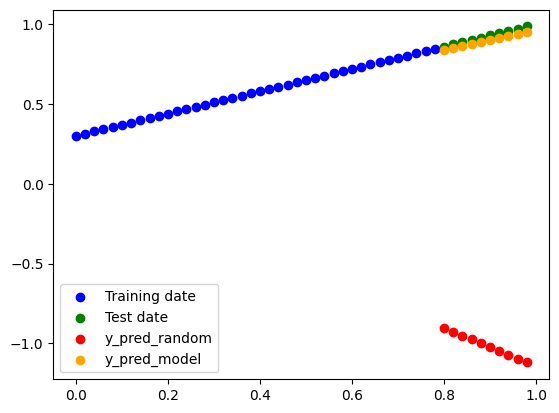

In [7]:
with torch.inference_mode(): 
    y_pred_random = model(x_test)
    y_pred_model = model_01(x_test)


plt.scatter(x_train, y_train, c='b', label='Training date')
plt.scatter(x_test, y_test, c='g', label='Test date')
plt.scatter(x_test, y_pred_random, c='r', label='y_pred_random')
plt.scatter(x_test, y_pred_model, c='orange', label='y_pred_model')
plt.legend()
plt.show()

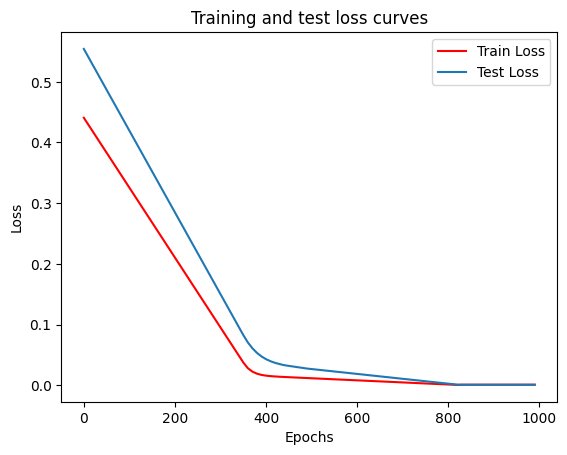

In [8]:
torch.manual_seed(36)
model_01 = LinearRegressionModel()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_01.parameters(), lr=0.001)
epochs = 1000

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_01.train()

    y_pred = model_01(x_train)
    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        model_01.eval()
        with torch.inference_mode():
            test_pred = model_01(x_test)   
            test_loss = loss_fn(test_pred, y_test)   
                
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        test_loss_values.append(test_loss.item())

plt.plot(epoch_count, loss_values, label='Train Loss', c='r')
plt.plot(epoch_count, test_loss_values, label='Test Loss')
plt.title('Training and test loss curves')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [9]:
# Save the entire model (less recommended but works)
torch.save(model_01, 'LinearModel.pth')

# Save only the state dictionary (BEST PRACTICE)
torch.save(model_01.state_dict(),'Linear_model_state.pth')

# Load entire model with weights_only=False (requires trust)
loaded_model_01 = torch.load('LinearModel.pth', weights_only=False)
loaded_model_01.eval()

# Load state dictionary (SAFER and RECOMMENDED)
new_model = LinearRegressionModel()
new_model.load_state_dict(torch.load('Linear_model_state.pth'))
new_model.eval()

LinearRegressionModel()

In [10]:
with torch.inference_mode():
    loaded_model_01_pred = loaded_model_01(x_test)
    new_model_pred = new_model(x_test)

loaded_model_01_pred == new_model_pred

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])